# Description:

    Investigate AOB abundance in samples



# Setting variables

# Init

In [2]:
import os
from pandas import DataFrame
from IPython.display import FileLink

In [3]:

%load_ext rpy2.ipython

In [10]:
%%R
# Note that Nick has separate phyloseq objects for sip and the bulk soil saved
physeqDir = '/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/physeq/'

physeqFull = 'Full-Sparsity3in3'
physeqFull.rel = 'Full-Sparsity3in3_relabund'
#physeqBulk = 'bulk-core' 


nprocs = 20

workDir = '/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/DeSeq2/'
figDir = '/home/bryan/RhizCG/figures/rhizosphere_enriched/'

RhizEnrichedFile = file.path(workDir, 'bare-plant.csv')

In [5]:
%%R
library(phyloseq)
library(ggplot2)
library(foreach)
library(doParallel)
library(gridExtra)
library(dplyr)
library(tidyr)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: foreach: simple, scalable parallel programming from Revolution Analytics
Use Revolution R for scalability, fault tolerance and more.
http://www.revolutionanalytics.com

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: iterators

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: parallel

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from

In [6]:
if not os.path.isdir(workDir):
    os.mkdir(workDir)

# Loading/editting OTU table

In [14]:
%%R 
F = file.path('/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/physeq/Full-Sparsity3in3')
physeq.Full = readRDS(F)
physeq.Full.m = physeq.Full %>% sample_data
physeq.Full %>% print

F.rel = file.path(physeqDir, physeqFull.rel)
physeqFull.snorm = readRDS(F.rel)
p.rel = physeqFull.snorm
p.rel

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4982 taxa and 238 samples ]
sample_data() Sample Data:       [ 238 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 4982 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4982 tips and 4981 internal nodes ]
phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4982 taxa and 238 samples ]
sample_data() Sample Data:       [ 238 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 4982 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4982 tips and 4981 internal nodes ]


In [15]:
%%R
sample_sums(p.rel)[1:4]

sample2-1.06_Npos sample6-4.27_Npos sample4-4.27_Nneg sample4-1.06_Nneg 
        0.9772621         0.9742362         0.9730047         0.9782814 


# Beta-proteobacteria distribution

## Generate abundance bar plots for each sample

# Explore OTU relative abundance

## Explore firmicutes

In [19]:
%%R
colnames(tax_table(p.rel)) = c("Kingdom", "Phylum",  "Class",   "Order",   
                         "Family",  "Genus",   "Species", "Strain")

In [20]:
%%R
get_taxa_unique(p.rel, "Class")

  [1] "32-21"                                       
  [2] "Holophagae"                                  
  [3] "Deltaproteobacteria"                         
  [4] "RB25"                                        
  [5] "DA023"                                       
  [6] "S035"                                        
  [7] NA                                            
  [8] "uncultured_bacterium"                        
  [9] "Nitrospira"                                  
 [10] "BPC015"                                      
 [11] "AT-s3-28"                                    
 [12] "BPC102"                                      
 [13] "Spirochaetales"                              
 [14] "11-24"                                       
 [15] "Candidatus_Chloracidobacterium"              
 [16] "RB41"                                        
 [17] "Candidatus_Methylacidiphilum"                
 [18] "S-BQ2-57_soil_group"                         
 [19] "OPB35_soil_group"                      

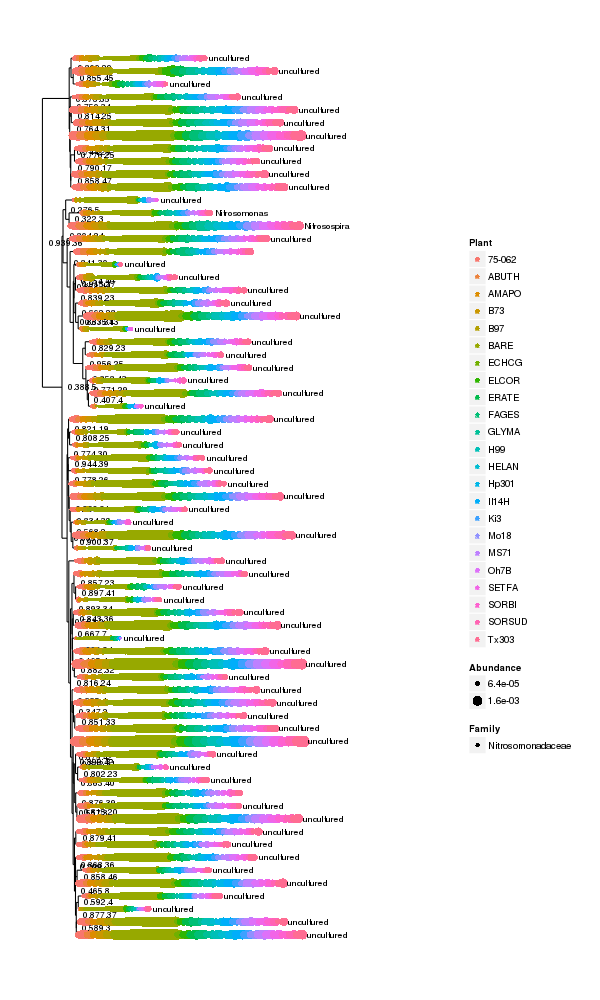

In [23]:
%%R -w 600 -h 1000
p.Nitro = subset_taxa(p.rel, Family == "Nitrosomonadaceae")
#topNOTUs = names(sort(taxa_sums(Rhiz.f), TRUE)[1:20])
#Rhiz.ft = prune_taxa(topNOTUs, Rhiz.f)
plot_tree(p.Nitro, color = "Plant", shape = "Family", label.tips = "Genus", 
          size = "abundance", plot.margin = 0.5, ladderize = TRUE)

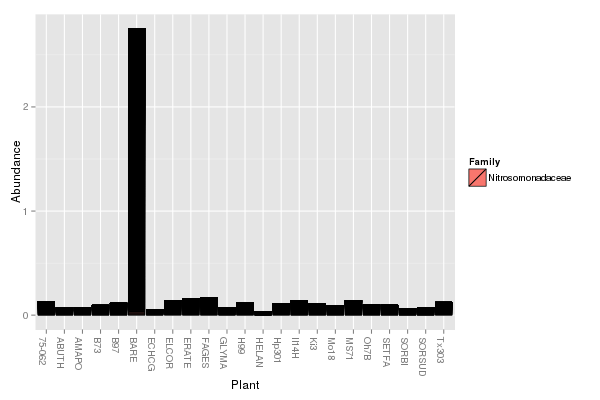

In [25]:
%%R -w 600 -h 400
p1 = plot_bar(p.Nitro, x="Plant", fill="Family")

#pdf("firmicutes_relabund.pdf")
p1
#dev.off()

In [26]:
%%R
tax_table(p.Nitro)

Taxonomy Table:     [69 taxa by 8 taxonomic ranks]:
          Kingdom    Phylum           Class                Order             
OTU.7887  "Bacteria" "Proteobacteria" "Betaproteobacteria" "Nitrosomonadales"
OTU.956   "Bacteria" "Proteobacteria" "Betaproteobacteria" "Nitrosomonadales"
OTU.940   "Bacteria" "Proteobacteria" "Betaproteobacteria" "Nitrosomonadales"
OTU.2508  "Bacteria" "Proteobacteria" "Betaproteobacteria" "Nitrosomonadales"
OTU.12024 "Bacteria" "Proteobacteria" "Betaproteobacteria" "Nitrosomonadales"
OTU.790   "Bacteria" "Proteobacteria" "Betaproteobacteria" "Nitrosomonadales"
OTU.562   "Bacteria" "Proteobacteria" "Betaproteobacteria" "Nitrosomonadales"
OTU.4520  "Bacteria" "Proteobacteria" "Betaproteobacteria" "Nitrosomonadales"
OTU.698   "Bacteria" "Proteobacteria" "Betaproteobacteria" "Nitrosomonadales"
OTU.3936  "Bacteria" "Proteobacteria" "Betaproteobacteria" "Nitrosomonadales"
OTU.210   "Bacteria" "Proteobacteria" "Betaproteobacteria" "Nitrosomonadales"
OTU.1091  "B